In [957]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import KNNImputer

import random

random.seed(42)

In [958]:
df = pd.read_csv('train.csv', index_col='id')

df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [959]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

In [960]:
#Policy Start Date заменим на значение года 
df['year'] = pd.to_datetime(df['Policy Start Date']) 
df['year'] = df['year'].dt.year

In [961]:
df_num = df.select_dtypes(include=np.number)
df_num.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,year
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03,2.021621e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02,1.476008e+00
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01,2.019000e+03
10%,2.200000e+01,2.627000e+03,0.000000e+00,9.936849e+00,0.000000,2.000000e+00,3.830000e+02,1.000000e+00,1.500000e+02,2.020000e+03
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02,2.020000e+03
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02,2.022000e+03
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03,2.023000e+03
90%,6.000000e+01,8.107500e+04,4.000000e+00,4.328134e+01,2.000000,1.800000e+01,7.920000e+02,9.000000e+00,2.363000e+03,2.024000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03,2.024000e+03


In [962]:
print('Пропуски: ', df_num.isna().sum())


Пропуски:  Age                      18705
Annual Income            44949
Number of Dependents    109672
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Premium Amount               0
year                         0
dtype: int64


In [963]:
print(df.select_dtypes(include=np.number).isna().sum())

Age                      18705
Annual Income            44949
Number of Dependents    109672
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Premium Amount               0
year                         0
dtype: int64


In [964]:
# df_num = df.select_dtypes(include=np.number)

# features = list(df_num.columns)
# fig, axes = plt.subplots(5, len(features) // 5 + 1, figsize=(32, 16))

# for idx, col in enumerate(features):
#     sns.kdeplot(data=df_num, x=col, ax=axes[idx % 5, idx // 5])

<Axes: >

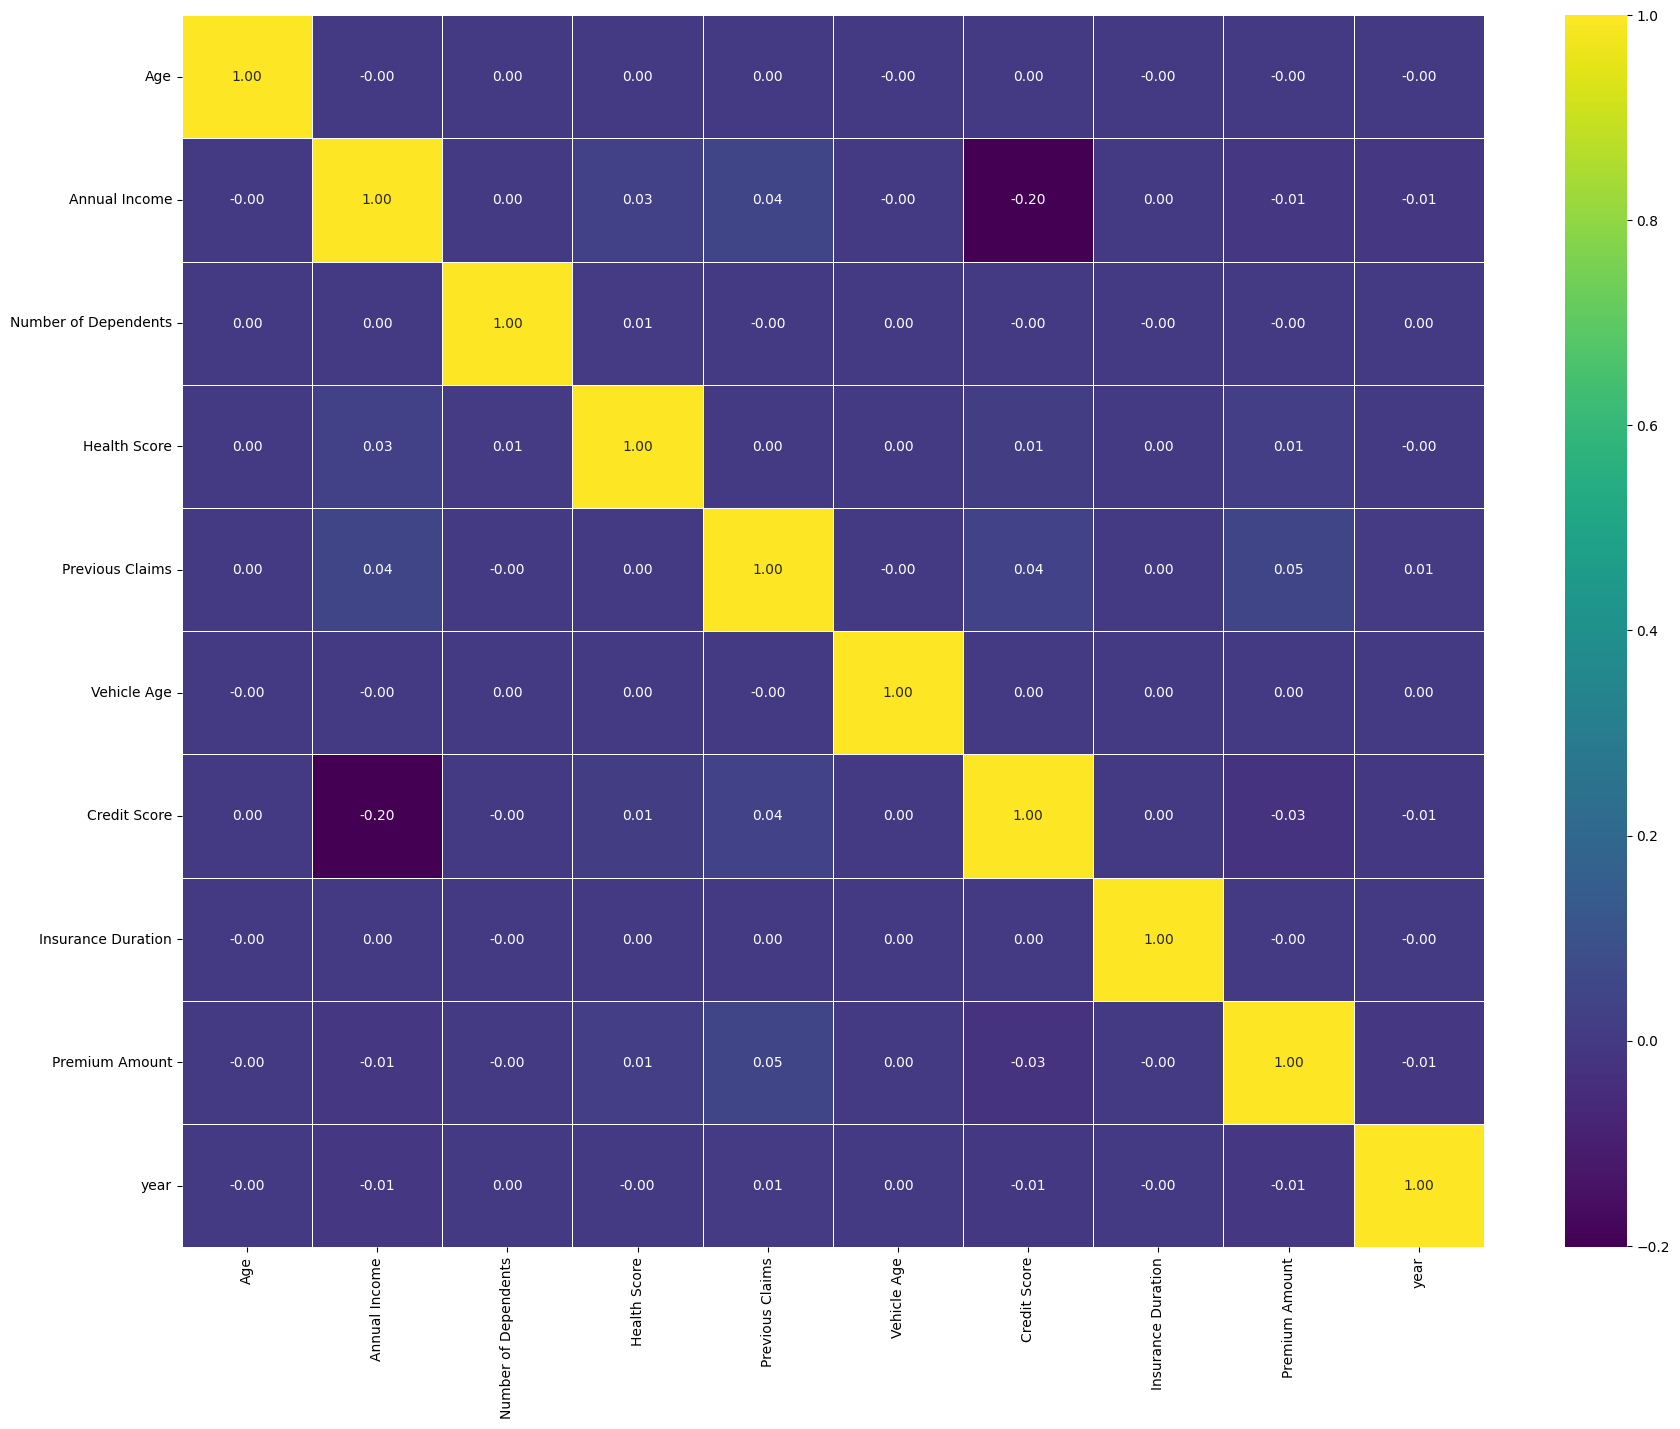

In [965]:
#Корреляция признаков между собой
plt.figure(figsize=(21, 16))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

In [966]:
print(df.select_dtypes(include=np.object_).isna().sum())


Gender                     0
Marital Status         18529
Education Level            0
Occupation            358075
Location                   0
Policy Type                0
Policy Start Date          0
Customer Feedback      77824
Smoking Status             0
Exercise Frequency         0
Property Type              0
dtype: int64


In [967]:
df['claim_frequency'] = df['Previous Claims'] / df['Insurance Duration']

df['policy_tenure_ratio'] = df['Insurance Duration'] / df['Age']

df['claim_ratio_per_year'] = df['Previous Claims'] / (df['Insurance Duration'] / 12)

df['credit_health_interaction'] = df['Credit Score'] * df['Health Score']

df['claims_to_income_ratio'] = (df['Previous Claims'] / df['Annual Income']) * 10000

In [968]:
#Преобразуем в категориальные фичи

for col in df.select_dtypes(include=np.object_).columns.to_list():
    df[col] = pd.Categorical(df[col])

In [969]:
#Посмотрим какие категори бывают
categorical = df.select_dtypes(include=['category']).columns.tolist()

cat_unique = {var: df[var].dropna().unique().tolist() for var in categorical}
cat_unique


{'Gender': ['Female', 'Male'],
 'Marital Status': ['Married', 'Divorced', 'Single'],
 'Education Level': ["Bachelor's", "Master's", 'High School', 'PhD'],
 'Occupation': ['Self-Employed', 'Employed', 'Unemployed'],
 'Location': ['Urban', 'Rural', 'Suburban'],
 'Policy Type': ['Premium', 'Comprehensive', 'Basic'],
 'Policy Start Date': ['2023-12-23 15:21:39.134960',
  '2023-06-12 15:21:39.111551',
  '2023-09-30 15:21:39.221386',
  '2024-06-12 15:21:39.226954',
  '2021-12-01 15:21:39.252145',
  '2022-05-20 15:21:39.207847',
  '2020-02-21 15:21:39.219432',
  '2022-08-08 15:21:39.181605',
  '2020-12-14 15:21:39.198406',
  '2020-08-02 15:21:39.144722',
  '2021-05-12 15:21:39.134960',
  '2020-03-22 15:21:39.155231',
  '2021-10-28 15:21:39.086123',
  '2023-01-20 15:21:39.132191',
  '2021-08-14 15:21:39.233998',
  '2020-10-17 15:21:39.209847',
  '2024-04-22 15:21:39.255696',
  '2020-12-27 15:21:39.090124',
  '2021-10-13 15:21:39.094752',
  '2020-06-25 15:21:39.152732',
  '2024-06-25 15:21:39.2

In [970]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

#Столбцы Education Level и Policy Type кодируем Ordinal Encoder (есть порядок)
# Gender Marital Status, Location через one hot (небольшое количество уникальных)


# Трансформер для категориальных признаков с OneHotEncoder
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Трансформеры для категориальных признаков с OrdinalEncoder
education_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[["Bachelor's", 'High School', "Master's", 'PhD']]))
])

feedback_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Poor', 'Average', 'Good']])) 
])

exercise_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Rarely', 'Monthly', 'Weekly', 'Daily']])) 
])

policy_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Basic', 'Comprehensive', 'Premium']]))
])


In [971]:
numerical_features = df.select_dtypes(include=np.number).columns.to_list()
numerical_features.remove('Premium Amount')
onehot_features = ['Marital Status', 'Location', 'Gender', 'Smoking Status', 'Property Type']
education_features = ['Education Level']
policy_feature = ['Policy Type']
feedback_feature = ['Customer Feedback']
exercise_feature = ['Exercise Frequency']


In [972]:
#Создаем линейную и полиномиальную модели

linear_transforms = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
]

num_linear_transformer = Pipeline(steps=linear_transforms)

best_features = 20

linear_preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_linear_transformer, numerical_features),
        ('onehot', onehot_transformer, onehot_features),
        ('education', education_transformer, education_features),
        ('policy', policy_transformer, policy_feature),
        ('feedback', feedback_transformer, feedback_feature),
        ('exrcise', exercise_transformer, exercise_feature)
    ])

model_linear = Pipeline(steps=[
    ('preprocessor', linear_preprocessor),
    # ('feature_selection', SelectKBest(score_func=f_regression, k=best_features)),
    ('regression', LinearRegression())
])


poly_transforms = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
]
num_poly_transformer = Pipeline(steps=poly_transforms)

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_poly_transformer, numerical_features),
        ('onehot', onehot_transformer, onehot_features),
        ('education', education_transformer, education_features),
        ('policy', policy_transformer, policy_feature),
        ('exrcise', exercise_transformer, exercise_feature),
        ('feedback', feedback_transformer, feedback_feature)
    ])


model_poly = Pipeline(steps=[
    ('preprocessor', poly_preprocessor),
    # ('feature_selection', SelectKBest(score_func=f_regression, k=best_features)),
    ('regression', LinearRegression())
])

In [973]:
df.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Smoking Status,Exercise Frequency,Property Type,Premium Amount,year,claim_frequency,policy_tenure_ratio,claim_ratio_per_year,credit_health_interaction,claims_to_income_ratio
id,,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,No,Weekly,House,2869.0,2023,0.400000,0.263158,4.8,8406.738970,1.990248
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,...,Yes,Monthly,House,1483.0,2023,0.500000,0.051282,6.0,10805.393307,0.315676
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,Yes,Weekly,House,567.0,2023,0.333333,0.130435,4.0,NaN,0.390594
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,...,Yes,Daily,Apartment,765.0,2024,1.000000,0.047619,12.0,4014.298906,0.070495
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,Yes,Weekly,House,2022.0,2021,0.000000,0.190476,0.0,12184.903989,0.000000


In [974]:
target_col = 'Premium Amount'
y = df[target_col]
df_train = df[numerical_features + onehot_features + education_features + policy_feature + feedback_feature + exercise_feature]
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2)


In [975]:
X_train.head()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,year,claim_frequency,...,claims_to_income_ratio,Marital Status,Location,Gender,Smoking Status,Property Type,Education Level,Policy Type,Customer Feedback,Exercise Frequency
id,,,,,,,,,,,,,,,,,,,,,
67452,53.0,12847.0,0.0,20.253803,0.0,3.0,642.0,7.0,2023,0.00,...,0.000000,Single,Suburban,Male,No,House,High School,Premium,Average,Weekly
309321,49.0,11212.0,4.0,36.644889,1.0,19.0,383.0,4.0,2023,0.25,...,0.891902,Divorced,Suburban,Female,Yes,Condo,Bachelor's,Premium,Good,Daily
285362,26.0,27063.0,1.0,18.076044,3.0,13.0,760.0,5.0,2022,0.60,...,1.108525,Single,Suburban,Male,Yes,Condo,Bachelor's,Basic,NaN,Rarely
1194299,43.0,34368.0,0.0,23.173550,2.0,12.0,731.0,8.0,2024,0.25,...,0.581937,Divorced,Suburban,Female,Yes,House,PhD,Comprehensive,Average,Daily
78534,40.0,16881.0,NaN,23.947138,0.0,19.0,515.0,1.0,2020,0.00,...,0.000000,Divorced,Suburban,Female,Yes,Condo,High School,Premium,Average,Daily


In [976]:
model_linear.fit(X_train, y_train)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['Age', 'Annual Income',
                                                   'Number of Dependents',
                                                   'Health Score',
                                                   'Previous Claims',
                                                   'Vehicle Age',
                                                   'Credit Score',
                                                   'Insurance Duration', 'year',
                                                   'claim_frequency',
                                                   'policy_tenur...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Rarely',
                                                                                               'Monthly',
                                                                                               'Weekly',
                                                                                               'Daily']]))]),
                                                  ['Exercise Frequency']),
                                                 ('feedback',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Average',
                                                                                               'Good']]))]),
                                                  ['Customer Feedback'])])),
                ('regression', LinearRegression())])

In [977]:
y_pred_lin_test = model_linear.predict(X_test)
y_pred_poly_test = model_poly.predict(X_test)


In [978]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_log_error 

def print_score(model_name, funcs, y, y_pred):
    print(f'Score for {model_name}')
    for func in funcs:
        print(f'{func.__name__}: {func(y, y_pred):.4f}')
    print()


print_score('Линейная регрессия', [mean_absolute_error, root_mean_squared_log_error, mean_squared_error, r2_score], y_test, y_pred_lin_test)
print_score('Полиномиальная регрессия', [mean_absolute_error, root_mean_squared_log_error, mean_squared_error, r2_score], y_test, y_pred_poly_test)


Score for Линейная регрессия
mean_absolute_error: 665.8113
root_mean_squared_log_error: 1.1662
mean_squared_error: 741293.4987
r2_score: 0.0027

Score for Полиномиальная регрессия
mean_absolute_error: 662.7839
root_mean_squared_log_error: 1.1623
mean_squared_error: 736916.0440
r2_score: 0.0086



Полиномиальная модель со степенью показала результаты лучше чем линейная по величине ошибки и R2 при прочих равных условиях. Количество фичей в обоих случаях - 11  